In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score , classification_report , accuracy_score , roc_auc_score, precision_score  , recall_score


In [2]:
path = "telecom_churn.csv"
df = pd.read_csv(path)
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(3333, 11)

In [7]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [8]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

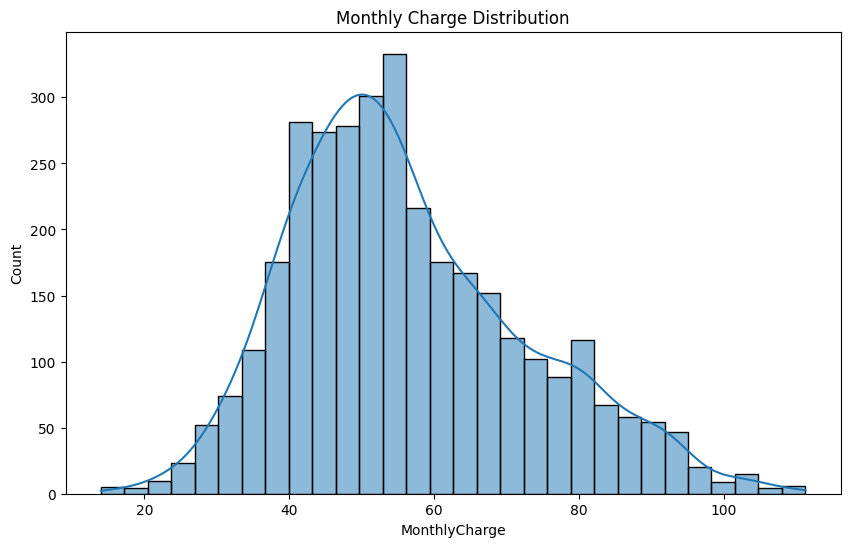

In [9]:
plt.figure(figsize=(10 ,6))
sns.histplot(df['MonthlyCharge'] , bins = 30 , kde = 2)
plt.title("Monthly Charge Distribution")
plt.show()

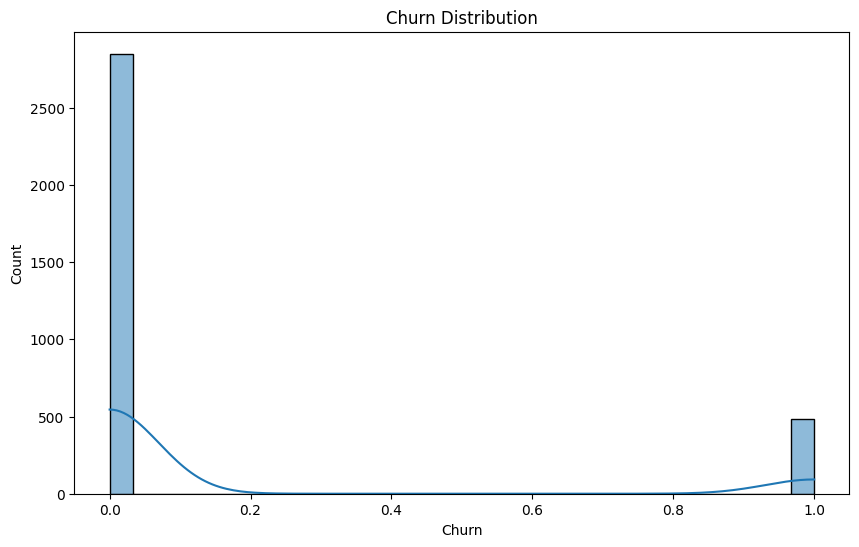

In [10]:
plt.figure(figsize=(10 ,6))
sns.histplot(df['Churn'], bins = 30 , kde = 2)
plt.title("Churn Distribution")
plt.show()

In [11]:
X = df.drop('Churn' , axis=  1)
y = df['Churn']

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 ,random_state=42)
print("X Train Shape:" ,X_train.shape)
print("X Test Shape:" ,X_test.shape)

X Train Shape: (2666, 10)
X Test Shape: (667, 10)


In [24]:
rf = RandomForestClassifier(class_weight='balanced' ,n_estimators=100 ,random_state=42 ,n_jobs = -1, max_depth=10)
rf.fit(X_train , y_train)

print("Model parameters:", rf.get_params())


Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [14]:
y_pred_rf = rf.predict(X_test)

In [25]:
log = LogisticRegression(class_weight='balanced', max_iter= 1000 ,random_state=42 ,n_jobs=-1)
log.fit(X_train ,y_train)
print("Coefficients:", log.coef_)
print("Intercept:", log.intercept_)
print("Model parameters:", log.get_params())

Coefficients: [[ 9.83105904e-04 -2.33020376e+00 -6.72616599e-01 -2.78965424e-01
   5.80260936e-01  8.69146304e-03  1.86451859e-04  2.06013981e-02
   7.20802050e-02  7.26782624e-02]]
Intercept: [-3.21967283]
Model parameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [16]:
y_pred_log = log.predict(X_test)


In [17]:
print("classification Report of Random Forest Classifier:")

print(classification_report(y_test, y_pred_rf))

classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       566
           1       0.77      0.65      0.71       101

    accuracy                           0.92       667
   macro avg       0.85      0.81      0.83       667
weighted avg       0.91      0.92      0.91       667



In [18]:
print("F1 Score value pf Random Forest Classifier:")
print(f1_score(y_test , y_pred_rf))
print() # For spacing 
print("ROC AUC Score value of Random Forest Classifier :")
print(roc_auc_score(y_test ,y_pred_rf))

F1 Score value pf Random Forest Classifier:
0.7058823529411765

ROC AUC Score value of Random Forest Classifier :
0.8090648287443586


In [19]:
print("classification Report of Logistic Regression:")
print(classification_report(y_test ,y_pred_log))

classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       566
           1       0.40      0.80      0.53       101

    accuracy                           0.79       667
   macro avg       0.68      0.79      0.70       667
weighted avg       0.87      0.79      0.81       667



In [20]:
print("F1 Score value pf Logistic Regression:")
print(f1_score(y_test , y_pred_log))
print() # For spacing 
print("ROC AUC Score value of Logistic Regression :")
print(roc_auc_score(y_test ,y_pred_log))

F1 Score value pf Logistic Regression:
0.5311475409836065

ROC AUC Score value of Logistic Regression :
0.7923328551936466


In [21]:
metrics = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_log)
    ],
    "Precision (Churn)": [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_log)
    ],
    "Recall (Churn)": [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_log)
    ],
    "F1-Score (Churn)": [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_log)
    ],
     "ROC-AUC": [
        roc_auc_score(y_test,log.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
    ]
   
}

results_df = pd.DataFrame(metrics)
results_df

,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn),ROC-AUC
0,Logistic Regression,0.917541,0.767442,0.653465,0.705882,0.828989
1,Random Forest,0.785607,0.397059,0.801980,0.531148,0.916104


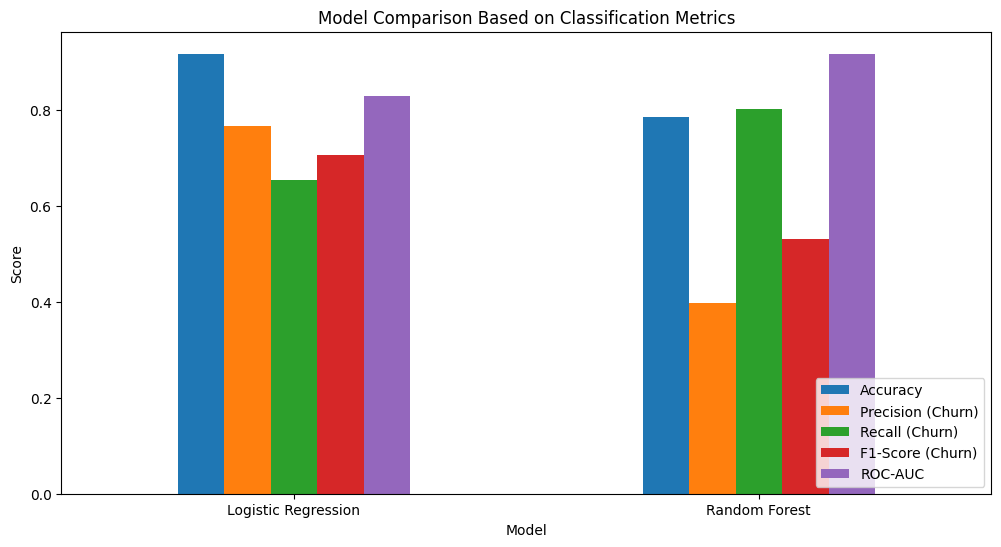

In [22]:
results_df.plot(
    x="Model",
    y=["Accuracy", "Precision (Churn)", "Recall (Churn)", "F1-Score (Churn)", "ROC-AUC"],
    kind="bar",
    figsize=(12,6)
)

plt.title("Model Comparison Based on Classification Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()